## Conceptos básicos de estadística descriptiva

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Titanic (viene integrado en seaborn)
df = sns.load_dataset("titanic")

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df["survived"].value_counts()

,count
survived,
0,549
1,342


In [7]:
df["survived"].dtypes

dtype('int64')

In [8]:
df['survived'] = df['survived'].astype('category')
df['survived'].dtypes

CategoricalDtype(categories=[0, 1], ordered=False, categories_dtype=int64)

## ***Frecuencias***

Frecuencia absoluta (f)

In [10]:
tabla = (
    df["pclass"]
    .value_counts()
    .sort_index()
    .to_frame(name="f")
)

tabla

,f
pclass,
1,216
2,184
3,491


Frecuencia relativa (fr)

In [11]:
tabla["fr"] = tabla["f"] / tabla["f"].sum()
tabla

,f,fr
pclass,,
1,216,0.242424
2,184,0.206510
3,491,0.551066


Frecuencia acumulada (fa)

In [12]:
tabla["fa"] = tabla["f"].cumsum()
tabla

,f,fr,fa
pclass,,,
1,216,0.242424,216
2,184,0.206510,400
3,491,0.551066,891


Frecuencia relativa acumulada (fra)

In [13]:
tabla["fra"] = tabla["fr"].cumsum()
tabla

,f,fr,fa,fra
pclass,,,,
1,216,0.242424,216,0.242424
2,184,0.206510,400,0.448934
3,491,0.551066,891,1.000000


<p>Primero contamos cuántos pasajeros hay en cada clase.

Luego vemos qué porcentaje representan del total.

Después acumulamos, para entender cómo se va construyendo el total del barco.

Esta tabla nos dice cómo estaba compuesto el Titanic antes de analizar cualquier otra cosa.</p>

## **Ejemplo de Tabla de Frecuencia**

In [14]:
import pandas as pd

# Datos del ejemplo (20 edades)
edades = [25, 26, 28, 25, 30, 26, 28, 30, 32, 25, 25, 26, 30, 32, 28, 25, 26, 28, 30, 25]

# 1) Frecuencia absoluta (f)
tabla = (
    pd.Series(edades, name="Edad")
      .value_counts()
      .sort_index()
      .to_frame(name="f")
)

# Total de observaciones
n = tabla["f"].sum()

# 2) Frecuencia relativa (fr) como porcentaje
tabla["fr (%)"] = (tabla["f"] / n) * 100

# 3) Frecuencia acumulada (fa)
tabla["fa"] = tabla["f"].cumsum()

# 4) Frecuencia relativa acumulada (fra) como porcentaje
tabla["fra (%)"] = tabla["fr (%)"].cumsum()

# Redondeo para que se vea como en la tabla
tabla = tabla.round({"fr (%)": 0, "fra (%)": 0})

tabla

,f,fr (%),fa,fra (%)
Edad,,,,
25,6,30.0,6,30.0
26,4,20.0,10,50.0
28,4,20.0,14,70.0
30,4,20.0,18,90.0
32,2,10.0,20,100.0


# **Histograma edad**

In [15]:
edades = df["age"].dropna()

In [16]:
bins = [0, 10, 20, 30, 40, 50, 60, 80]

In [17]:
clases = pd.cut(edades, bins=bins, right=False)

Tabla de frecuencias por intervalos

In [18]:
tabla = (
    clases
    .value_counts()
    .sort_index()
    .to_frame(name="f")
)

# Total
n = tabla["f"].sum()

# Frecuencia relativa (%)
tabla["fr (%)"] = (tabla["f"] / n) * 100

# Frecuencia acumulada
tabla["fa"] = tabla["f"].cumsum()

# Frecuencia relativa acumulada (%)
tabla["fra (%)"] = tabla["fr (%)"].cumsum()

tabla = tabla.round({"fr (%)": 1, "fra (%)": 1})
tabla

,f,fr (%),fa,fra (%)
age,,,,
"[0, 10)",62,8.7,62,8.7
"[10, 20)",102,14.3,164,23.0
"[20, 30)",220,30.9,384,53.9
"[30, 40)",167,23.4,551,77.3
"[40, 50)",89,12.5,640,89.8
"[50, 60)",48,6.7,688,96.5
"[60, 80)",25,3.5,713,100.0


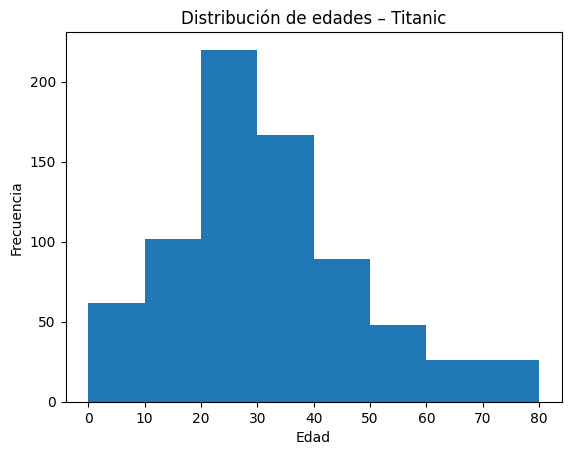

In [19]:
plt.figure()
plt.hist(edades, bins=bins)
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Distribución de edades – Titanic")
plt.show()

## Medidas de Tendencia Central


N (sin nulos): 714
Media:   29.70
Mediana: 28.00
Moda:    24.00


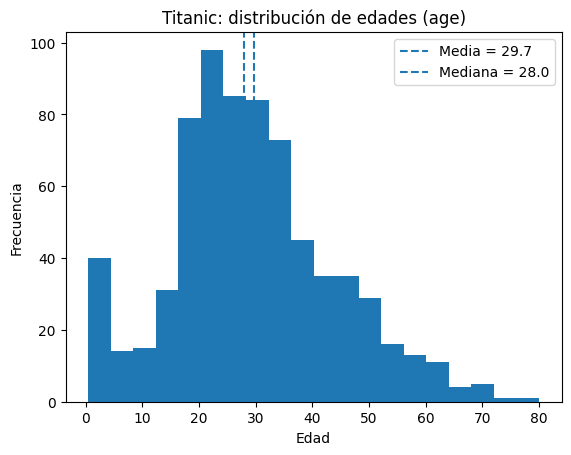

In [23]:
# 2) Preparar la variable (edad) y limpiar nulos
age = df["age"].dropna()

# 3) Medidas de tendencia central
media = age.mean()
mediana = age.median()

# Moda: puede haber más de una. Nos quedamos con la primera para el ejemplo.
modas = age.mode()
moda = modas.iloc[0] if not modas.empty else np.nan

# 4) Mostrar resultados (formato simple)
print(f"N (sin nulos): {len(age)}")
print(f"Media:   {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Moda:    {moda:.2f}")
if len(modas) > 1:
    print(f"Nota: hay {len(modas)} modas. Primeras 5: {modas.head().tolist()}")

# 5) (Opcional) Gráfico para apoyar la explicación
plt.figure()
plt.hist(age, bins=20)
plt.axvline(media, linestyle="--", label=f"Media = {media:.1f}")
plt.axvline(mediana, linestyle="--", label=f"Mediana = {mediana:.1f}")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Titanic: distribución de edades (age)")
plt.legend()
plt.show()

## Ejemplo Práctico: Notas de Estudiantes

In [24]:
import numpy as np
from collections import Counter

# Notas del ejemplo
notas = [3, 6, 8, 9, 10, 10, 10, 4, 5]

# -----------------------
# Media
# -----------------------
suma = sum(notas)
n = len(notas)
media = suma / n

# -----------------------
# Mediana
# -----------------------
notas_ordenadas = sorted(notas)
mediana = np.median(notas_ordenadas)

# -----------------------
# Moda
# (si hay varias modas, las lista)
# -----------------------
conteo = Counter(notas)
max_freq = max(conteo.values())
modas = sorted([valor for valor, freq in conteo.items() if freq == max_freq])

# -----------------------
# Salida "tipo slide"
# -----------------------
print("Notas:", notas)
print("\n--- MEDIA ---")
print(f"Suma = {suma}")
print(f"Media = {suma}/{n} = {media:.2f}")

print("\n--- MEDIANA ---")
print("Ordenando:", notas_ordenadas)

# Explicar mediana según par/impar
if n % 2 == 1:
    idx_central = n // 2
    print(f"n es impar -> posición central = {idx_central} (0-index) -> Mediana = {notas_ordenadas[idx_central]}")
else:
    idx1 = n//2 - 1
    idx2 = n//2
    print(f"n es par -> posiciones centrales = {idx1} y {idx2} -> Mediana = ({notas_ordenadas[idx1]} + {notas_ordenadas[idx2]})/2")

print(f"Mediana = {mediana:.0f}" if float(mediana).is_integer() else f"Mediana = {mediana}")

print("\n--- MODA ---")
print("Conteo:", dict(sorted(conteo.items())))
if len(modas) == 1:
    print(f"Moda = {modas[0]} (se repite {max_freq} veces)")
else:
    print(f"Modas = {modas} (cada una se repite {max_freq} veces)")

Notas: [3, 6, 8, 9, 10, 10, 10, 4, 5]

--- MEDIA ---
Suma = 65
Media = 65/9 = 7.22

--- MEDIANA ---
Ordenando: [3, 4, 5, 6, 8, 9, 10, 10, 10]
n es impar -> posición central = 4 (0-index) -> Mediana = 8
Mediana = 8

--- MODA ---
Conteo: {3: 1, 4: 1, 5: 1, 6: 1, 8: 1, 9: 1, 10: 3}
Moda = 10 (se repite 3 veces)


## Medidas de Dispersión

Medidas de dispersión con age – Dataset Titanic

In [25]:
# 2) Seleccionar variable y eliminar valores nulos
age = df["age"].dropna()

# -----------------------
# Medidas de dispersión
# -----------------------

# Rango
edad_min = age.min()
edad_max = age.max()
rango = edad_max - edad_min

# Varianza
varianza = age.var()        # por defecto: varianza muestral

# Desviación estándar
desv_std = age.std()        # raíz de la varianza

# -----------------------
# Resultados
# -----------------------
print(f"N (sin nulos): {len(age)}")
print(f"Edad mínima: {edad_min}")
print(f"Edad máxima: {edad_max}")
print(f"Rango: {rango:.2f}")
print(f"Varianza: {varianza:.2f}")
print(f"Desviación estándar: {desv_std:.2f}")

N (sin nulos): 714
Edad mínima: 0.42
Edad máxima: 80.0
Rango: 79.58
Varianza: 211.02
Desviación estándar: 14.53


Ejemplo Práctico: Comparación de Grupos

In [26]:
import numpy as np
import pandas as pd

# Datos del ejemplo
grupo_a = [6, 6, 7, 7, 7, 8, 9]
grupo_b = [3, 5, 7, 7, 9, 10, 11]

def resumen_grupo(valores, nombre="Grupo"):
    s = pd.Series(valores)

    media = s.mean()
    rango = s.max() - s.min()

    # Varianza y desviación estándar
    varianza = s.var()
    desv_std = s.std()

    print(f"\n{nombre}: {valores}")
    print(f"Media = {media:.0f}" if float(media).is_integer() else f"Media = {media:.2f}")
    print(f"Rango = {s.max()} - {s.min()} = {rango}")
    print(f"Varianza ≈ {varianza:.2f}")
    print(f"Desviación estándar ≈ {desv_std:.2f}")

# Mostrar resultados
resumen_grupo(grupo_a, "Grupo A")
resumen_grupo(grupo_b, "Grupo B")

print("\nConclusión: aunque ambos grupos tienen la misma media, el Grupo B presenta mayor dispersión.")


Grupo A: [6, 6, 7, 7, 7, 8, 9]
Media = 7.14
Rango = 9 - 6 = 3
Varianza ≈ 1.14
Desviación estándar ≈ 1.07

Grupo B: [3, 5, 7, 7, 9, 10, 11]
Media = 7.43
Rango = 11 - 3 = 8
Varianza ≈ 7.95
Desviación estándar ≈ 2.82

Conclusión: aunque ambos grupos tienen la misma media, el Grupo B presenta mayor dispersión.


# PARTE 2

Corrección de Bessel

In [32]:
import numpy as np

# Datos del ejemplo (tiempos en minutos)
x = np.array([12, 14, 15, 15, 13, 16])

n = len(x)
media = x.mean()
media

np.float64(14.166666666666666)

In [33]:
mediana = np.median(x)
mediana

np.float64(14.5)

In [34]:
from collections import Counter

conteo = Counter(x)
max_freq = max(conteo.values())
modas = sorted([valor for valor, freq in conteo.items() if freq == max_freq])
modas

[np.int64(15)]

In [35]:
# Desviaciones y desviaciones al cuadrado
desv = x - media
desv2 = desv**2
suma_desv2 = desv2.sum()

# Varianza poblacional (divide por n)
var_pob = suma_desv2 / n

# Varianza muestral con Bessel (divide por n-1)
var_mues = suma_desv2 / (n - 1)

var_pob, var_mues

(np.float64(1.8055555555555556), np.float64(2.166666666666667))

In [36]:
# Desviación estándar
std_pob = np.sqrt(var_pob)
std_mues = np.sqrt(var_mues)

In [37]:
print("Datos:", x.tolist())
print(f"Media = {media:.0f}")

print("\nDesviaciones (x - media):", desv.tolist())
print("Desviaciones al cuadrado:", desv2.tolist())
print(f"Suma de cuadrados = {suma_desv2:.0f}")

print("\nVarianza poblacional (n):")
print(f"σ² = {suma_desv2:.0f}/{n} = {var_pob:.2f}")

print("\nVarianza muestral (n-1) con corrección de Bessel:")
print(f"s² = {suma_desv2:.0f}/{n-1} = {var_mues:.2f}")

print("\nDesviación estándar:")
print(f"σ = sqrt({var_pob:.2f}) = {std_pob:.2f}")
print(f"s = sqrt({var_mues:.2f}) = {std_mues:.2f}")

Datos: [12, 14, 15, 15, 13, 16]
Media = 14

Desviaciones (x - media): [-2.166666666666666, -0.16666666666666607, 0.8333333333333339, 0.8333333333333339, -1.166666666666666, 1.833333333333334]
Desviaciones al cuadrado: [4.694444444444442, 0.027777777777777582, 0.6944444444444454, 0.6944444444444454, 1.3611111111111098, 3.3611111111111134]
Suma de cuadrados = 11

Varianza poblacional (n):
σ² = 11/6 = 1.81

Varianza muestral (n-1) con corrección de Bessel:
s² = 11/5 = 2.17

Desviación estándar:
σ = sqrt(1.81) = 1.34
s = sqrt(2.17) = 1.47


La corrección de Bessel es un pequeño ajuste para no engañarnos cuando tenemos pocos datos.

# Medidas de posición

In [40]:
import pandas as pd
import seaborn as sns

# Cargar dataset
df = sns.load_dataset("titanic")

# Variable de interés
age = df["age"].dropna()

In [41]:
# Cuartiles
Q1 = age.quantile(0.25)
Q2 = age.quantile(0.50)  # mediana
Q3 = age.quantile(0.75)

print("Cuartiles (edad):")
print(f"Q1 (25%): {Q1:.1f}")
print(f"Q2 (50% - mediana): {Q2:.1f}")
print(f"Q3 (75%): {Q3:.1f}")

Cuartiles (edad):
Q1 (25%): 20.1
Q2 (50% - mediana): 28.0
Q3 (75%): 38.0


  *  Q1 = 20.1 años

El 25% de los pasajeros tenía 20 años o menos (y el 75% era mayor que eso).

  *  Q2 = 28 años (mediana)

  La mitad de los pasajeros tenía menos de 28 años,
  y la otra mitad, más de 28.

  * Q3 = 38 años

  El 75% de los pasajeros tenía menos de 38 años,
  solo un 25% era mayor que eso.

In [42]:
# Deciles
deciles = age.quantile([i/10 for i in range(1,10)])
print("\nDeciles (edad):")
print(deciles.round(1))


Deciles (edad):
0.1    14.0
0.2    19.0
0.3    22.0
0.4    25.0
0.5    28.0
0.6    31.8
0.7    36.0
0.8    41.0
0.9    50.0
Name: age, dtype: float64


Decil 0.1 = 14 años

El 10% más joven del Titanic tenía 14 años o menos.

Decil 0.5 = 28 años

Coincide con la mediana: la mitad tenía menos de 28 años.

Decil 0.9 = 50 años

El 90% de los pasajeros tenía menos de 50 años.
Solo el 10% superaba esa edad.

In [43]:
# Percentiles clave
percentiles = age.quantile([0.10, 0.25, 0.50, 0.75, 0.90])
print("\nPercentiles seleccionados (edad):")
print(percentiles.round(1))


Percentiles seleccionados (edad):
0.10    14.0
0.25    20.1
0.50    28.0
0.75    38.0
0.90    50.0
Name: age, dtype: float64


Percentil 10 = 14 años

Si tenías 14 años, estabas entre el 10% más joven.

Percentil 75 = 38 años

Con 38 años, ya estabas entre el 25% de mayor edad.

Percentil 90 = 50 años

Con 50 años o más, eras parte de un grupo muy pequeño.

Cuartiles → dividen en 4 partes

Deciles → dividen en 10 partes

Percentiles → dividen en 100 partes

Todos responden la misma pregunta: “¿Dónde estoy parado dentro del grupo?”

In [44]:
# Cuartiles
Q1 = age.quantile(0.25)
Q3 = age.quantile(0.75)

# IQR
IQR = Q3 - Q1

# Límites para outliers
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

print(f"Q1 (25%): {Q1:.1f}")
print(f"Q3 (75%): {Q3:.1f}")
print(f"IQR: {IQR:.1f}")

print("\nLímites para outliers:")
print(f"Inferior: {lim_inf:.1f}")
print(f"Superior: {lim_sup:.1f}")

# Valores extremos
outliers = age[(age < lim_inf) | (age > lim_sup)]
print(f"\nCantidad de outliers: {len(outliers)}")
print("Edades extremas:", sorted(outliers.unique()))

Q1 (25%): 20.1
Q3 (75%): 38.0
IQR: 17.9

Límites para outliers:
Inferior: -6.7
Superior: 64.8

Cantidad de outliers: 11
Edades extremas: [np.float64(65.0), np.float64(66.0), np.float64(70.0), np.float64(70.5), np.float64(71.0), np.float64(74.0), np.float64(80.0)]


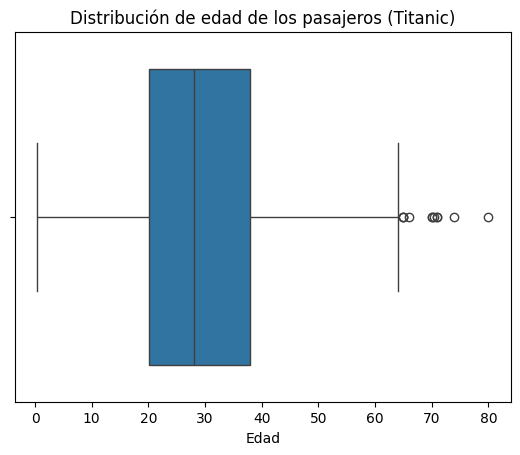

In [45]:
import matplotlib.pyplot as plt

plt.figure()
sns.boxplot(x=age)
plt.title("Distribución de edad de los pasajeros (Titanic)")
plt.xlabel("Edad")
plt.show()

## Ejemplo Aplicado: Tiempos de Entrega

In [46]:
import pandas as pd

# Tiempos de entrega (en días) para 20 clientes
tiempos = [2, 2, 3, 3, 3, 4, 4, 5, 5, 6, 6, 6, 7, 7, 8, 9, 10, 10, 12, 14]
s = pd.Series(tiempos, name="tiempo_entrega")

# Medidas de posición
q1 = s.quantile(0.25)
q2 = s.quantile(0.50)  # mediana
q3 = s.quantile(0.75)
p90 = s.quantile(0.90)

print("Tiempos de entrega (días):", tiempos)
print("\nMedidas de posición:")
print(f"Q1 (25%): {q1:.0f}")
print(f"Q2 (50% - mediana): {q2:.0f}")
print(f"Q3 (75%): {q3:.0f}")
print(f"Percentil 90: {p90:.0f}")

print("\nInterpretación (como en la lámina):")
print(f"• El 25% de los clientes recibieron su pedido en {q1:.0f} días o menos.")
print(f"• La mediana es {q2:.0f} días.")
print(f"• El 75% de los clientes recibieron su pedido en {q3:.0f} días o menos.")
print(f"• El 90% de los clientes recibieron su pedido en {p90:.0f} días o menos.")

Tiempos de entrega (días): [2, 2, 3, 3, 3, 4, 4, 5, 5, 6, 6, 6, 7, 7, 8, 9, 10, 10, 12, 14]

Medidas de posición:
Q1 (25%): 4
Q2 (50% - mediana): 6
Q3 (75%): 8
Percentil 90: 10

Interpretación (como en la lámina):
• El 25% de los clientes recibieron su pedido en 4 días o menos.
• La mediana es 6 días.
• El 75% de los clientes recibieron su pedido en 8 días o menos.
• El 90% de los clientes recibieron su pedido en 10 días o menos.


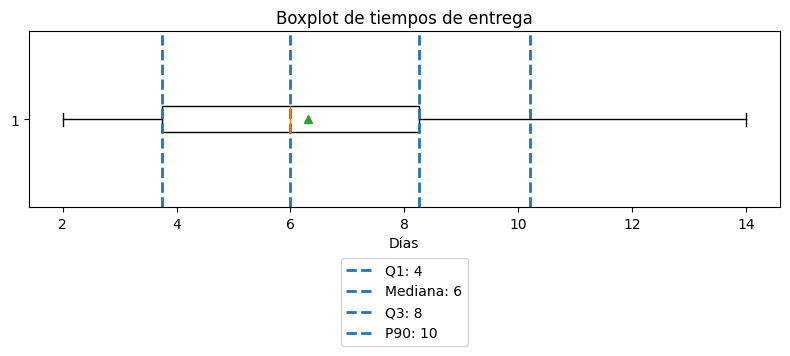

In [52]:
plt.figure(figsize=(8, 4))
plt.boxplot(s, vert=False, showmeans=True)
plt.title("Boxplot de tiempos de entrega")
plt.xlabel("Días")

for val, label in [(q1, "Q1"), (q2, "Mediana"), (q3, "Q3"), (p90, "P90")]:
    plt.axvline(val, linestyle="--", linewidth=2, label=f"{label}: {val:.0f}")

plt.legend(ncol=1, loc="upper center", bbox_to_anchor=(0.5, -0.25))
plt.tight_layout()
plt.show()

## Puntos atípicos (Outliers)

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos
ingresos_sin_outlier = [800, 850, 880, 890, 900, 910, 920, 930]
ingresos_con_outlier = ingresos_sin_outlier + [10000]

s1 = pd.Series(ingresos_sin_outlier, name="ingresos")
s2 = pd.Series(ingresos_con_outlier, name="ingresos")

In [59]:
s1

,ingresos
0,800
1,850
2,880
3,890
4,900
5,910
6,920
7,930


In [60]:
s2

,ingresos
0,800
1,850
2,880
3,890
4,900
5,910
6,920
7,930
8,10000


In [61]:
# Métricas
def resumen(s):
    return {
        "n": len(s),
        "media": s.mean(),
        "mediana": s.median(),
        "desv_std_muestral": s.std(ddof=1)  # muestral (Bessel)
    }

r1 = resumen(s1)
r2 = resumen(s2)

In [62]:
r1

{'n': 8,
 'media': np.float64(885.0),
 'mediana': 895.0,
 'desv_std_muestral': 42.42640687119285}

In [63]:
r2

{'n': 9,
 'media': np.float64(1897.7777777777778),
 'mediana': 900.0,
 'desv_std_muestral': 3038.5925104305193}

In [64]:
print("SIN outlier")
print(f"n = {r1['n']}")
print(f"Media = ${r1['media']:.2f}")
print(f"Mediana = ${r1['mediana']:.0f}")
print(f"Desviación estándar = {r1['desv_std_muestral']:.2f}")

print("\nCON outlier ($10,000)")
print(f"n = {r2['n']}")
print(f"Media = ${r2['media']:.2f}")
print(f"Mediana = ${r2['mediana']:.0f}")
print(f"Desviación estándar = {r2['desv_std_muestral']:.2f}")

SIN outlier
n = 8
Media = $885.00
Mediana = $895
Desviación estándar = 42.43

CON outlier ($10,000)
n = 9
Media = $1897.78
Mediana = $900
Desviación estándar = 3038.59


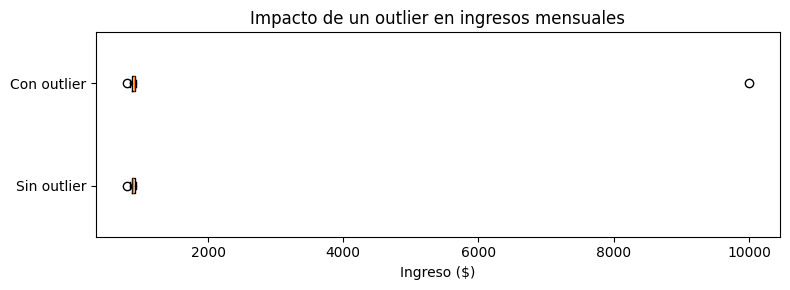

In [69]:
# Gráfica (boxplot comparativo)
plt.figure(figsize=(8, 3))
plt.boxplot([s1, s2], vert=False, tick_labels=["Sin outlier", "Con outlier"])
plt.title("Impacto de un outlier en ingresos mensuales")
plt.xlabel("Ingreso ($)")
plt.tight_layout()
plt.show()